In [6]:
import json
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
import pandas as pd

## Plotting Graphs

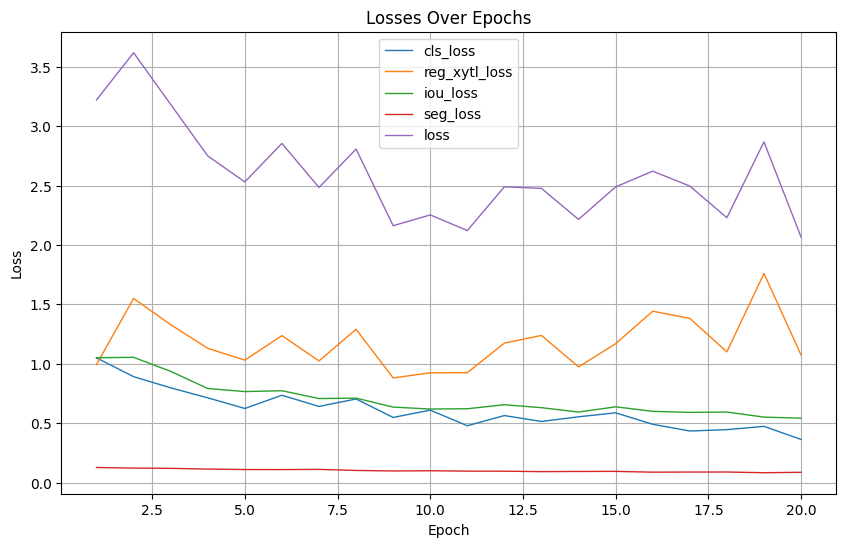

In [112]:
import re
import matplotlib.pyplot as plt

log_file_path = '/Users/shehryarsohail-nu/Downloads/logs/res50_.log'

loss_values = {}
epoch_losses = {}

with open(log_file_path, 'r') as log_file:
    for line in log_file:
        match_losses = re.findall(r'(\w+): (\d+\.\d+)', line)
        match_epoch = re.search(r'Epoch \[(\d+)\]', line)
        
        if match_losses:
            for loss_type, loss_value in match_losses:
                epoch_losses[loss_type] = float(loss_value)
        
        if match_epoch:
            epoch = int(match_epoch.group(1))
            loss_values[epoch] = epoch_losses.copy()

# Create a plot with legends
loss_types = ['cls_loss', 'reg_xytl_loss', 'iou_loss', 'seg_loss', 'loss']
plt.figure(figsize=(10, 6))
for loss_type in loss_types:
    values = [loss_values[epoch].get(loss_type, 0) for epoch in loss_values]
    plt.plot(list(loss_values.keys()), values, marker='', linestyle='-', linewidth=1, label=loss_type)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses Over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/plots/res_50_loss_plot.png')
plt.show()


In [109]:
def plot_losses_from_log_files(files, colors, labels, verbose, no_of_itrations_per_epoch, lr=True):
    plt.figure(figsize=(10, 6))

    eps = []
    
    for index, file in enumerate(files):
        with open(file, 'r') as json_file:
            data = json_file.readlines()

        total_losses = []
        iterations = []
        cumulative_iteration = 0

        epoch_val = []
        
        num_epochs = 0
        for line in data:
            entry = dict(json.loads(line))
            num_epochs = entry.get('epoch')
            
        losses_per_epoch_per_file = np.zeros(num_epochs)
        
        for line in data:
            entry = dict(json.loads(line))
            try:
                total_loss = entry.get('loss')
                if entry.get('mode') == 'train' and total_loss is not None and entry.get('iter', 0) % verbose == 0:
                    iteration = entry.get('iter', 0)
                    iterations.append((entry.get('epoch') - 1) * no_of_itrations_per_epoch + iteration)
                    total_losses.append(total_loss)
                    losses_per_epoch_per_file[entry.get('epoch') - 1] = total_loss
                    
                    epoch_val.append(entry.get('epoch'))
                    
            except json.JSONDecodeError:
                print(f"Error decoding JSON: {line}")
            
        plt.plot(iterations, total_losses, marker='', linestyle='-', linewidth=1, label=labels[index])
        eps.append((f'{file}, file {index+1}: ', losses_per_epoch_per_file))
        
    plt.xlabel('Cumulative Iterations')
    plt.ylabel('Total Loss')
#     if lr: plt.title(f'Total Loss Over Cumulative Iterations (Every {verbose}) - Different Learning Rates')
#     else: plt.title(f'Total Loss Over Cumulative Iterations (Every {verbose}) - Different Augmentations')
    plt.title(f'Total Loss Over Cumulative Iterations (Every {verbose}) - Long Run')
    plt.legend()
    plt.grid(True)
#     if lr: plt.savefig('/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/plots/total_loss_plot_learningrate.png')
#     else: plt.savefig('/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/plots/total_loss_plot_augmentations.png')
    plt.savefig('/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/plots/total_loss_plots_long_run.png')
    plt.show()
    
    return eps

- ('logs/1e-2.log_lr_2.json, file 1: ', array([5.79766, 5.29528, 5.08409]))
- ('logs/1e-3.log_lr_3.json, file 2: ', array([5.02668, 5.05111, 4.9776 ]))
- ('logs/1e-4.log_1e-4.json, file 3: ', array([2.98532, 2.58337, 2.29465]))

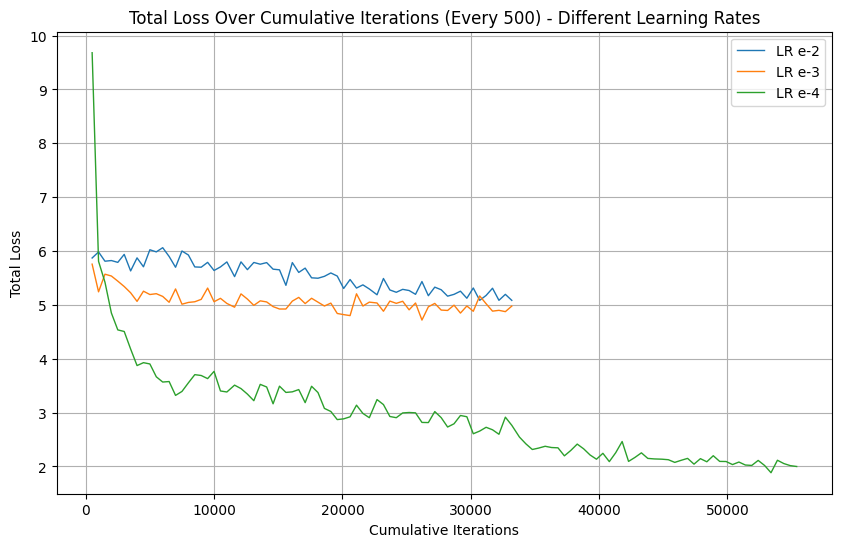

[('/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/logs/full_logs/1e-2.log_lr_2.json, file 1: ',
  array([5.79766, 5.29528, 5.08409])),
 ('/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/logs/full_logs/1e-3.log.json, file 2: ',
  array([5.02668, 5.05111, 4.9776 ])),
 ('/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/logs/full_logs/longrun1e-4.log.json, file 3: ',
  array([3.38246, 2.90487, 2.76423, 2.13957, 1.99885]))]

In [105]:
files = [
    '/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/logs/full_logs/1e-2.log_lr_2.json',
    '/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/logs/full_logs/1e-3.log.json',
    '/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/logs/full_logs/longrun1e-4.log.json',
]

colors = ['blue', 'green', 'red']
labels = [
    'LR e-2', 
    'LR e-3', 
    'LR e-4', 
]

no_of_itrations_per_epoch = 11100
verbose = 500

plot_losses_from_log_files(files, colors, labels, verbose, no_of_itrations_per_epoch)

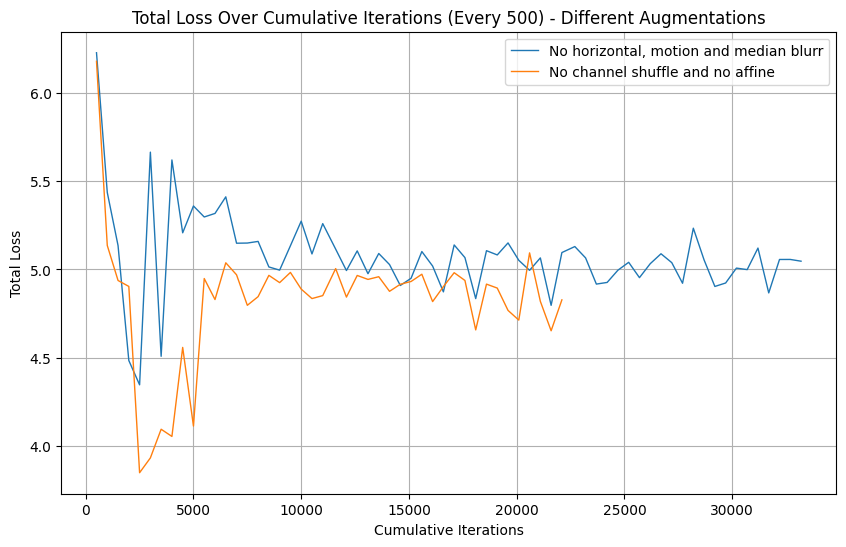

[('/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/logs/full_logs/augexp1.log_no_aug.json, file 1: ',
  array([5.25982, 5.09574, 5.04672])),
 ('/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/logs/full_logs/augexp2.log_less_aug.json, file 2: ',
  array([4.85147, 4.82737]))]

In [107]:
files = [
    '/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/logs/full_logs/augexp1.log_no_aug.json',
    '/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/logs/full_logs/augexp2.log_less_aug.json',
]

colors = ['red', 'blue']
labels = ['No horizontal, motion and median blurr', 'No channel shuffle and no affine']

verbose = 500
no_of_itrations_per_epoch = 11100
learning_rate_mode = False

plot_losses_from_log_files(files, colors, labels, verbose, no_of_itrations_per_epoch, learning_rate_mode)

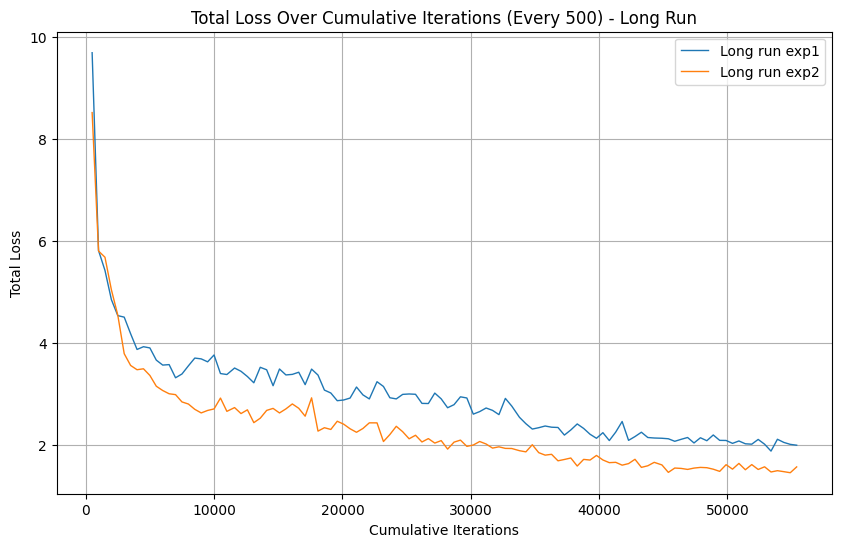

[('/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/logs/full_logs/longrun1e-4.log.json, file 1: ',
  array([3.38246, 2.90487, 2.76423, 2.13957, 1.99885])),
 ('/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/logs/full_logs/longrun1e-4augexp2.log.json, file 2: ',
  array([2.66151, 2.43647, 1.93412, 1.66315, 1.57385]))]

In [123]:
files = [
    '/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/logs/full_logs/longrun1e-4.log.json',
    '/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/logs/full_logs/longrun1e-4augexp2.log.json',
]

colors = ['red', 'blue']
labels = ['Long run exp1', 'Long run exp2']

verbose = 500
no_of_itrations_per_epoch = 11100

plot_losses_from_log_files(files, colors, labels, verbose, no_of_itrations_per_epoch)

In [129]:
def plot_different_losses_from_single_log(filename, verbose, no_of_itrations_per_epoch, name):

    plt.figure(figsize=(10, 6))

    with open(filename, 'r') as json_file:
        data = json_file.readlines()

    loss_types = ['cls_loss', 'reg_xytl_loss', 'iou_loss', 'seg_loss']

#     colors = ['blue', 'green', 'red', 'purple']
    labels = ['Classification Loss', 'Regression Loss', 'IoU Loss', 'Segmentation Loss']

    for loss_index, loss_type in enumerate(loss_types):
        loss_values = []
        iterations = []

        for line in data:
            entry = dict(json.loads(line))
            try:
                if entry.get('mode') == 'train':
                    loss_value = entry.get(loss_type)
                    if loss_value is not None and entry.get('iter', 0) % verbose == 0:
                        iteration = entry.get('iter', 0)
                        cumulative_iteration = (entry.get('epoch') - 1) * no_of_itrations_per_epoch + iteration
                        iterations.append(cumulative_iteration)
                        loss_values.append(loss_value)
            except json.JSONDecodeError:
                print(f"Error decoding JSON: {line}")

        plt.plot(iterations, loss_values, marker='', linestyle='-', linewidth=1, label=labels[loss_index])

    plt.xlabel('Cumulative Iterations')
    plt.ylabel('Loss Value')
    plt.title(f'Loss Types Over Cumulative Iterations (Every {verbose}) - {name}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/plots/{name}.png')
    plt.show()

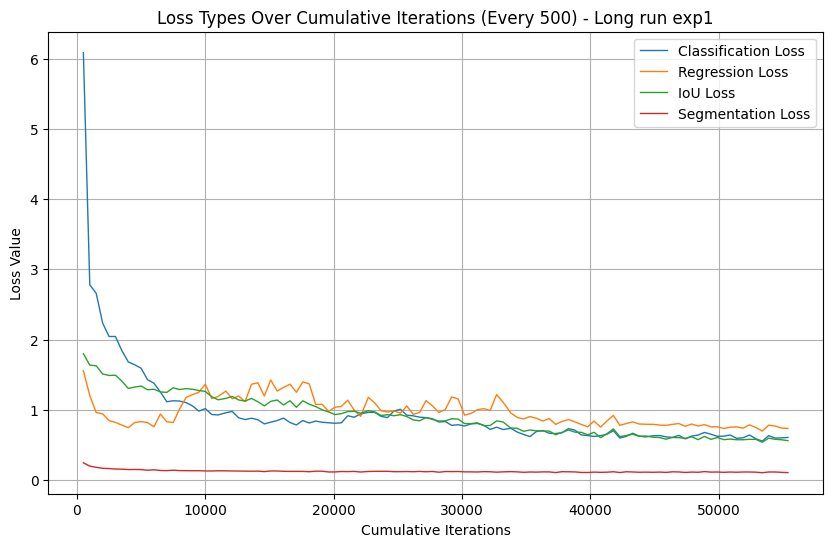

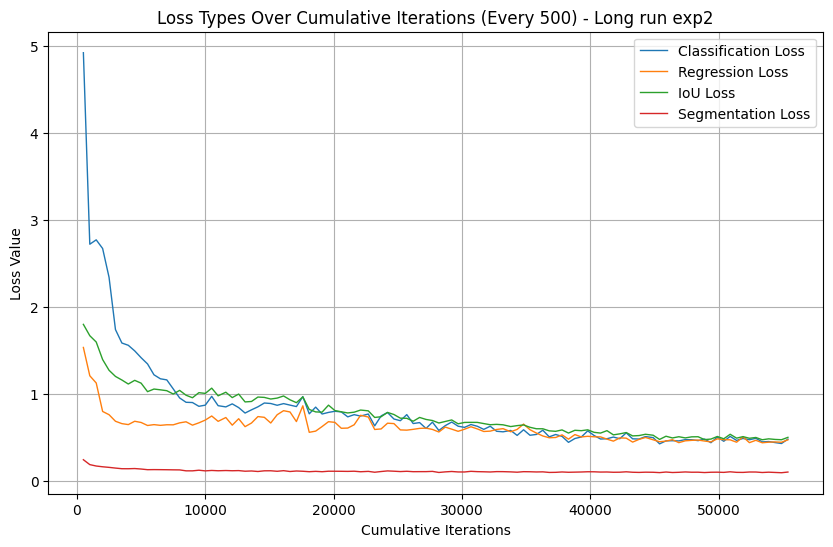

In [131]:
# filename = 'logs/1e-2.log_lr_2.json'
files = [
    '/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/logs/full_logs/longrun1e-4.log.json',
    '/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/logs/full_logs/longrun1e-4augexp2.log.json',
#     '/Users/shehryarsohail-nu/Desktop/OSFormer_code/output_dir/logs/full_logs/longrun1e-4augexp2.log.json',
]

names = ['Long run exp1', 'Long run exp2']
verbose = 500
no_of_itrations_per_epoch = 11100

for index, i in enumerate(files):
    plot_different_losses_from_single_log(i, verbose, no_of_itrations_per_epoch, names[index])

### Plotting Augmentations

In [18]:
def plot_augmentations(image_path, mode):
    '''
    mode (int) - 0: single; augmentation on the original image
                 -1: cumulative; augmentation on the transformed image
    '''
    ori_img_w = 1640
    ori_img_h = 590
    img_w = 800
    img_h = 320
    cut_height = 270

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    transformations = [
        A.Resize(height=img_h, width=img_w),
        A.HorizontalFlip(p=1),
        A.ChannelShuffle(p=1),
        A.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.15, hue=0.1, p=1),
        A.HueSaturationValue(hue_shift_limit=(-10, 10), p=1),
        A.MotionBlur(blur_limit=(3, 5), p=1),
        A.MedianBlur(blur_limit=(3, 5), p=1),
        A.Affine(
            translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
            rotate=(-10, 10),
            scale=(0.8, 1.2),
            p=1),
    ]

    transformed_images = [image]
    for transform in transformations:
        transformed_image = A.Compose([transform])(image=transformed_images[mode])["image"]
        transformed_images.append(transformed_image)

    plt.figure(figsize=(15, 8))
    plt.subplot(3, 3, 1)
    plt.imshow(image)
    plt.title('Original Image')

    transform_names = [
        'RandomBrightnessContrast', 'HorizontalFlip', 'ChannelShuffle', 'ColorJitter',
        'HueSaturationValue', 'MotionBlur', 'MedianBlur', 'Affine'
    ]

    for i, transformed_image in enumerate(transformed_images[1:], start=2):
        plt.subplot(3, 3, i)
        plt.imshow(transformed_image)
        plt.title(f'{transform_names[i-2]}')

    plt.tight_layout()
    plt.savefig('Cumulative Augmentations.png')
    plt.show()

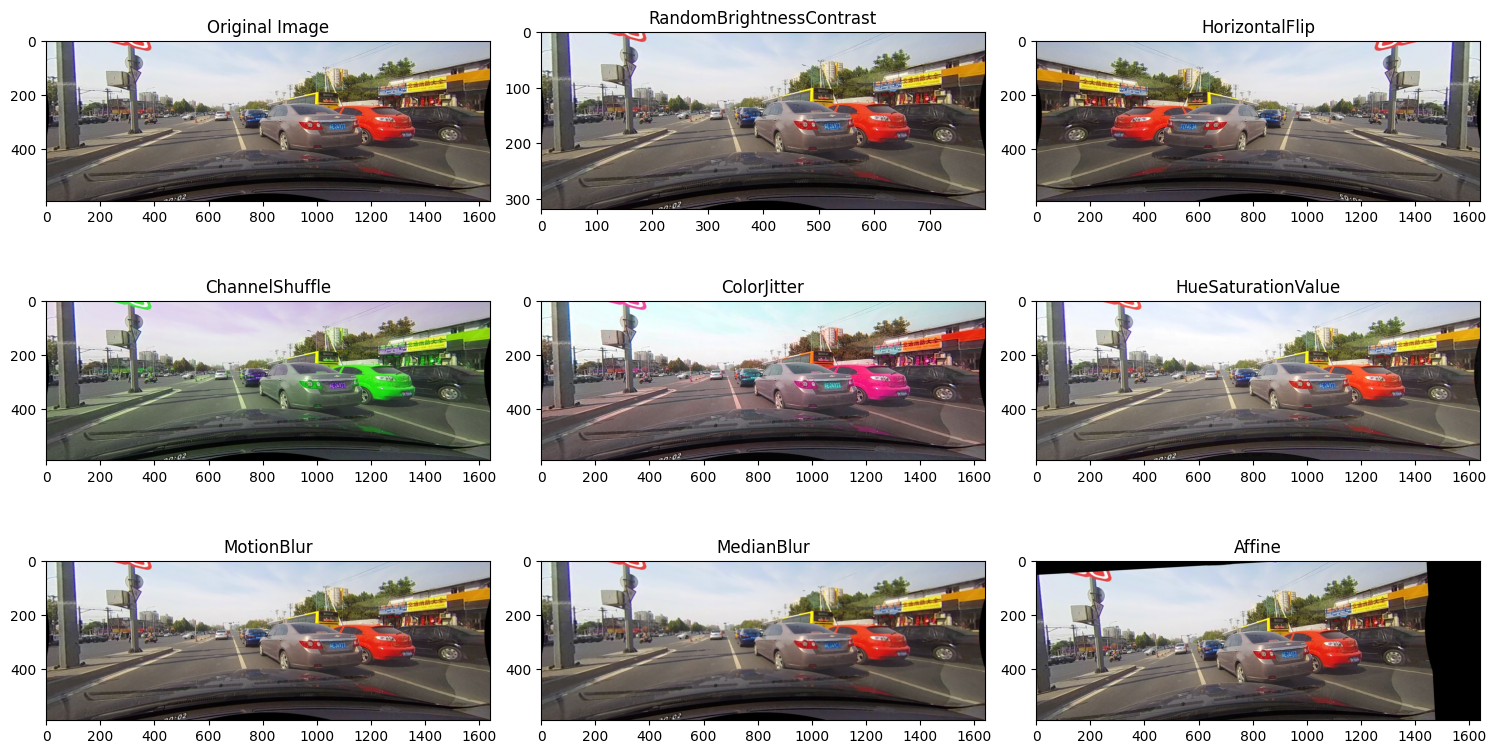

In [19]:
image_path = '/Users/shehryarsohail-nu/Downloads/CULane/driver_37_30frame/05181520_0219.MP4/00030.jpg'

plot_augmentations(image_path, 0) # single

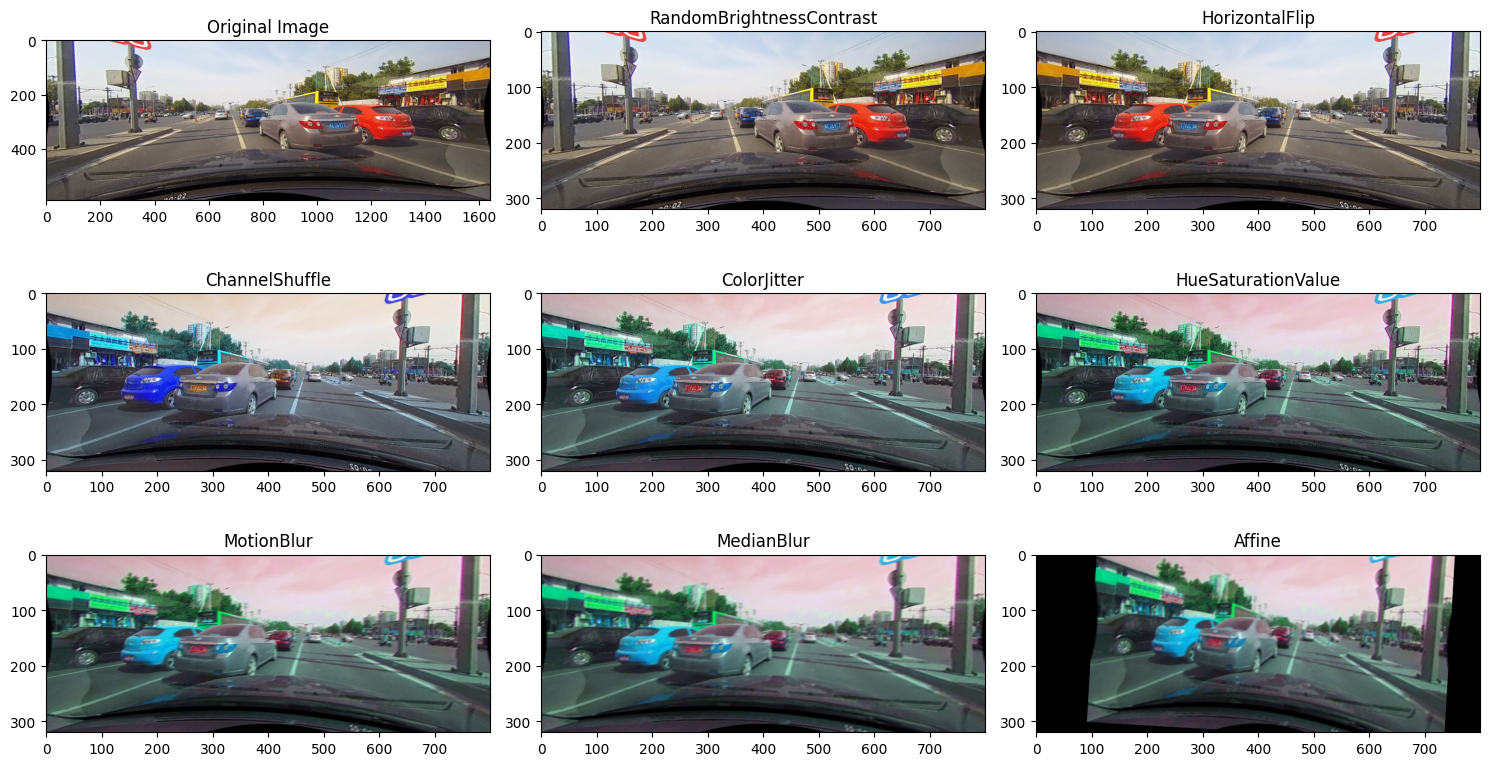

In [20]:
plot_augmentations(image_path, -1) # cumulative